## Dataset Summary

The `insurance.csv` dataset is packed with information on health insurance customers, this dataset is the key to unlocking patterns in healthcare costs. Here's what you need to know about the data:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is required to ensure the dataset is ready for modeling. Once the model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to the training data minus the `charges` column, tests the developed model's accuracy and real-world utility by predicting costs for new customers.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [2]:
# Summary/ Description of Data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [3]:
insurance.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


### Data cleaning
- The number of rows availble is inconsistent, there are missing values in the dataset.
- The naming convention for the regions are written is inconsistent and has to be standardized.
- The data type as seen from the info for smoker is object, that can be changed to boolean for convenience.
- It can be noted that from looking at the first 5 rows of the data, the charges column has some values with currency and others without.
- The data type as seen from the info for charges is object, hence why the numeric description is not available. 

In [4]:
# Count the null values in each column
insurance.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [5]:
# The null values are not too much and can be dropped
insurance.dropna(inplace=True)

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [6]:
# Review region
insurance['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [7]:
insurance['region'] = insurance['region'].str.lower()

insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
# Review sex
insurance['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [9]:
gender_map = {'F':'female','woman':'female','man':'male','M':'male'}
insurance['sex'] = insurance['sex'].replace(gender_map)

insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
# Review smoker
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
insurance['smoker'] = insurance['smoker'] == 'yes'

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [13]:
# Review charges
insurance['charges'] = insurance['charges'].str.strip('$').astype('float64')

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [14]:
# There is a new null value is the charges column that will simply be dropped
insurance.dropna(inplace=True)

In [15]:
insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
262,52.0,male,24.32,3.0,True,northeast,24869.83680
792,22.0,female,23.18,0.0,False,northeast,2731.91220
691,-47.0,male,36.20,-1.0,False,southwest,8068.18500
699,23.0,female,39.27,2.0,False,southeast,3500.61230
1082,38.0,male,19.95,1.0,False,northwest,5855.90250
1315,18.0,male,28.31,1.0,False,northeast,11272.33139
391,19.0,female,37.43,0.0,False,northwest,2138.07070
1160,43.0,female,34.58,1.0,False,northwest,7727.25320
1276,22.0,female,30.40,0.0,False,northeast,2741.94800
29,31.0,male,36.30,2.0,True,southwest,38711.00000


In [16]:
# There is a negative value in the age column which could be a typo during data entry.
# The absolute function will be applied to the dataset
insurance_abs = insurance.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

In [17]:
insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
77,21.0,male,35.530,0.0,False,southeast,1532.46970
319,32.0,male,37.335,1.0,False,northeast,4667.60765
1096,51.0,female,34.960,2.0,True,northeast,44641.19740
570,31.0,female,29.100,0.0,False,southwest,3761.29200
1123,27.0,female,32.395,1.0,False,northeast,18903.49141
299,48.0,female,28.880,1.0,False,northwest,9249.49520
939,53.0,male,29.480,0.0,False,southeast,9487.64420
509,57.0,female,28.700,-0.0,False,southwest,11455.28000
80,31.0,male,26.885,1.0,False,northeast,4441.21315
852,46.0,female,35.530,0.0,True,northeast,42111.66470


In [18]:
df = insurance_abs.copy()

### Data Visualization

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


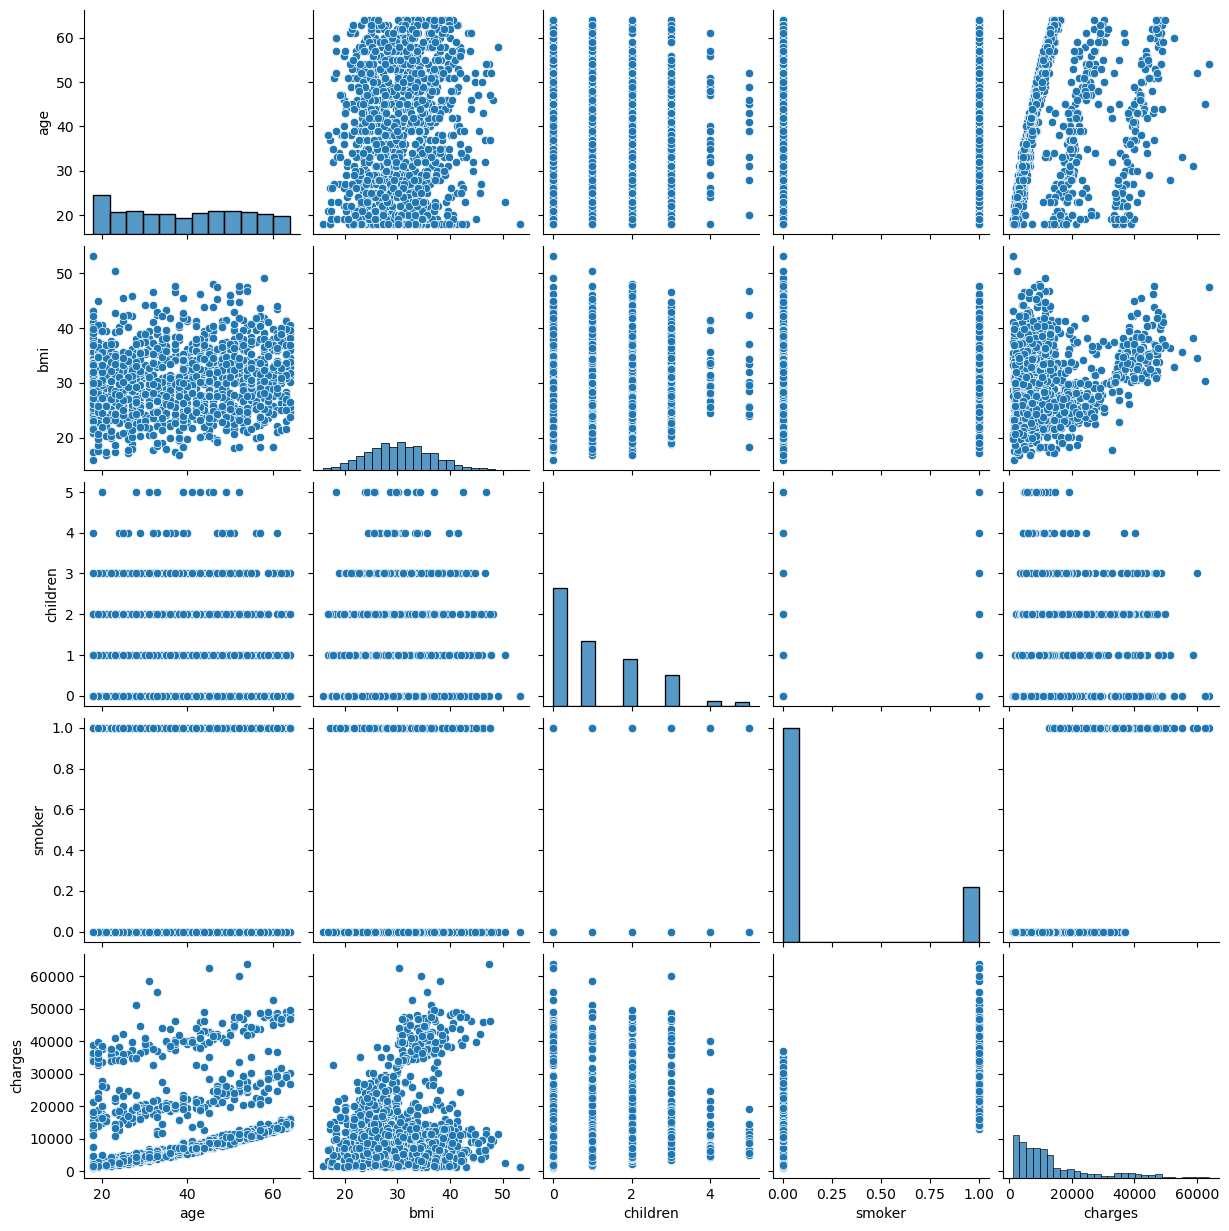

In [19]:
import seaborn as sns
sns.pairplot(df)

There is a positive relationship between age and charges, and BMI and charges. 

### Prepare the data for modelling

In [20]:
new_df = pd.get_dummies(df, prefix=['sex','smoker','region'], columns=['sex','smoker','region'])
new_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_False,smoker_True,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0


### Create Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x= new_df.drop(columns=['charges'])
y= new_df['charges']

# Split data into train and test set
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.25, random_state=42)

# Create and train model
model= LinearRegression()
model.fit(x_train,y_train)

# Make prediction based on test set
pred= model.predict(x_test)

# Calculate error 
r2_score = r2_score(y_test,pred)

r2_score

0.6974678652026609

In [29]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV()

ridge_model.fit(x_train, y_train)

# Make prediction based on test set
pred= ridge_model.predict(x_test)

# Calculate error 
r2_score = r2_score(y_test,pred)

r2_score

0.697672339875528

## Using Validation Dataset

In [39]:
validation = pd.read_csv('validation_dataset.csv')

validation.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [32]:
def clean_df(df):
    df['region'] = df['region'].str.lower()
    gender_map = {'F':'female','woman':'female','man':'male','M':'male'}
    df['sex'] = df['sex'].replace(gender_map)
    df['smoker'] = df['smoker'] == 'yes'
    df.dropna(inplace=True)
    df = df.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
    new_df = pd.get_dummies(df, prefix=['sex','smoker','region'], columns=['sex','smoker','region'])
    
    return new_df

In [33]:
validation = clean_df(validation)
validation.head()

,age,bmi,children,sex_female,sex_male,smoker_False,smoker_True,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,24.090000,1.0,1,0,1,0,0,0,1,0
1,39.0,26.410000,0.0,0,1,0,1,1,0,0,0
2,27.0,29.150000,0.0,0,1,0,1,0,0,1,0
3,71.0,65.502135,13.0,0,1,0,1,0,0,1,0
4,28.0,38.060000,0.0,0,1,1,0,0,0,1,0


In [34]:
pred= model.predict(validation)
pred

array([  464.9875125 , 30775.48293654, 27872.80530138, 57775.8272698 ,
        6761.64099989, 59271.91264351,  6873.69011545, 12986.67525072,
       12449.68893523, 16297.97699934,  2389.4689754 , 14276.63068829,
       11467.24308689, 12110.22929806,  2454.47213015,  3624.8558064 ,
       42736.54111592, 64982.49735925, 59633.49325911, 11279.97276548,
        -381.29713243, 12825.16047869, 32286.01909498, 12229.26288715,
        9535.72474089,  4877.4231636 , 59477.12548699,  3344.62480415,
       12027.93750214, 10582.11137303,  6081.52776769, 27346.24838108,
       31021.75243275, 13200.211333  , 32518.78777585, 13734.87353234,
       59342.28793193, 14531.12660351,  -151.8696199 , 30243.18221329,
       30212.20413851, 11684.76247712,  3689.3377575 , 60607.48076092,
        5469.06598959, 40112.64555781, 68804.80585269, 30730.10044018,
       14893.2377864 , 35684.69827323])

In [37]:
# Instruction is to handle any negative values by replacing them with the minimum basic charge, set at 1000. Also save dataframe as validation_data

validation_data = validation.copy()

# Save predicted charges to dataframe
validation_data['predicted_charges'] = pred

# Set the predicted charges to the basic charge of 1000 if it is less than 1000
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data

,age,bmi,children,sex_female,sex_male,smoker_False,smoker_True,region_northeast,region_northwest,region_southeast,region_southwest,predicted_charges
0,18.0,24.090000,1.0,1,0,1,0,0,0,1,0,1000.000000
1,39.0,26.410000,0.0,0,1,0,1,1,0,0,0,30775.482937
2,27.0,29.150000,0.0,0,1,0,1,0,0,1,0,27872.805301
3,71.0,65.502135,13.0,0,1,0,1,0,0,1,0,57775.827270
4,28.0,38.060000,0.0,0,1,1,0,0,0,1,0,6761.641000
5,70.0,72.958351,11.0,1,0,0,1,0,0,1,0,59271.912644
6,29.0,32.110000,2.0,1,0,1,0,0,1,0,0,6873.690115
7,42.0,41.325000,1.0,1,0,1,0,1,0,0,0,12986.675251
8,48.0,36.575000,0.0,1,0,1,0,0,1,0,0,12449.688935
9,63.0,33.660000,3.0,0,1,1,0,0,0,1,0,16297.976999
